In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [123]:
file_path = r'C:\Users\P.DEEPIKA\Downloads\ecommerce_dataset_updated.csv'  # Update this with your dataset path
df = pd.read_csv(file_path)


In [125]:
df.head() # Displays the first 5 rows of the dataset (default).

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12-11-2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,09-02-2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,01-09-2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,01-04-2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27-09-2024


In [127]:
df.tail() # Displays the last 5 rows of the dataset (default).

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,Purchase_Date
3655,67abda0a,28714133-6,Beauty,486.79,0,486.79,UPI,14-05-2024
3656,34ebc1a0,08838c2c-9,Toys,212.87,15,180.94,Cash on Delivery,19-11-2024
3657,1defd3b1,c39a4f16-6,Home & Kitchen,389.76,0,389.76,Net Banking,07-08-2024
3658,0611293d,b4f67f96-9,Electronics,447.66,30,313.36,UPI,21-05-2024
3659,e73ad07c,a5d07442-d,Home & Kitchen,235.77,30,165.04,UPI,14-04-2024


In [129]:
df.info() # Provides a summary of columns, non-null values, and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3660 entries, 0 to 3659
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           3660 non-null   object 
 1   Product_ID        3660 non-null   object 
 2   Category          3660 non-null   object 
 3   Price (Rs.)       3660 non-null   float64
 4   Discount (%)      3660 non-null   int64  
 5   Final_Price(Rs.)  3660 non-null   float64
 6   Payment_Method    3660 non-null   object 
 7   Purchase_Date     3660 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 228.9+ KB


In [131]:
df.isnull().sum() # Checks for missing values (returns a DataFrame of True/False).

User_ID             0
Product_ID          0
Category            0
Price (Rs.)         0
Discount (%)        0
Final_Price(Rs.)    0
Payment_Method      0
Purchase_Date       0
dtype: int64

In [133]:
df.describe() # Generates summary statistics for numerical columns

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


In [135]:
df.shape # Returns the dimensions (rows, columns) of the dataset

(3660, 8)

In [136]:
df.describe() # Generates summary statistics for numerical columns

,Price (Rs.),Discount (%),Final_Price(Rs.)
count,3660.000000,3660.000000,3660.000000
mean,254.800675,18.825137,206.906579
std,141.682621,14.731338,122.687844
min,10.090000,0.000000,5.890000
25%,134.012500,5.000000,104.512500
50%,253.845000,15.000000,199.185000
75%,377.595000,25.000000,304.117500
max,499.960000,50.000000,496.820000


<Axes: >

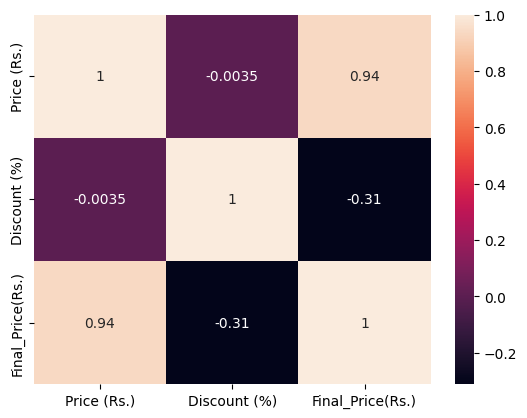

In [139]:
correlation = df.corr(numeric_only=True)
sns.heatmap(correlation,annot=True, fmt='.2g')

C:\Users\P.DEEPIKA\AppData\Local\Temp\ipykernel_5532\2105179697.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df['Category'].value_counts().reset_index() , x='Category' , y='count',palette='viridis')


<Axes: xlabel='Category', ylabel='count'>

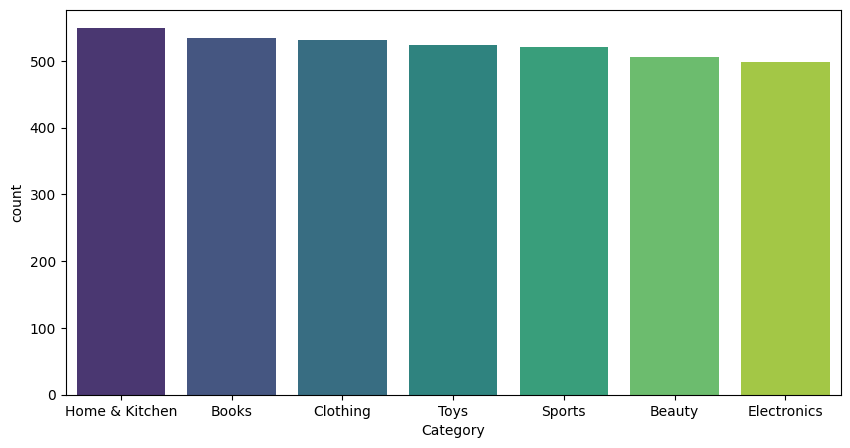

In [140]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(data = df['Category'].value_counts().reset_index() , x='Category' , y='count',palette='viridis')


C:\Users\P.DEEPIKA\AppData\Local\Temp\ipykernel_5532\2560866693.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.groupby(by='Category')['Final_Price(Rs.)'].sum().reset_index() , x='Category' , y='Final_Price(Rs.)',palette = 'pastel')


<Axes: xlabel='Category', ylabel='Final_Price(Rs.)'>

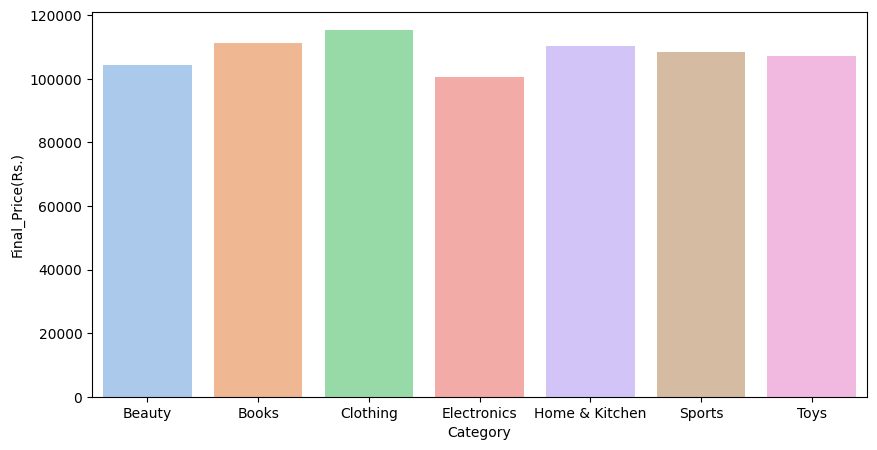

In [142]:
plt.figure(figsize=(10,5))
sns.barplot(data = df.groupby(by='Category')['Final_Price(Rs.)'].sum().reset_index() , x='Category' , y='Final_Price(Rs.)',palette = 'pastel')

C:\Users\P.DEEPIKA\AppData\Local\Temp\ipykernel_5532\2901284075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df.groupby(by='Category')['Discount (%)'].mean().reset_index() , x='Category' , y='Discount (%)',palette = 'husl')


<Axes: xlabel='Category', ylabel='Discount (%)'>

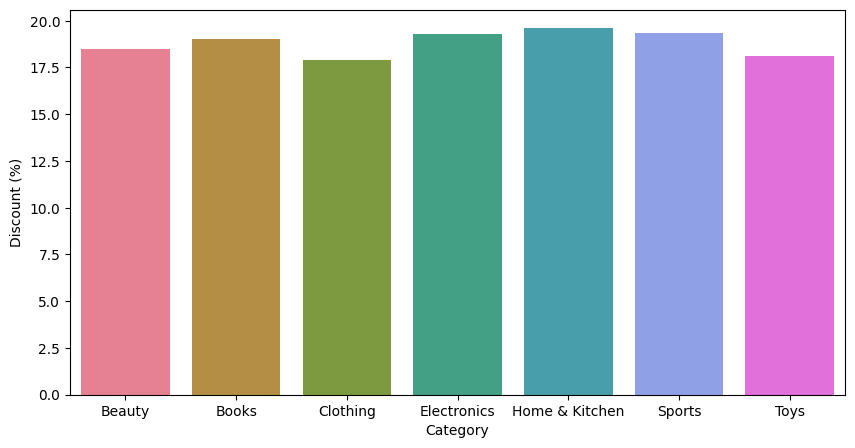

In [143]:
plt.figure(figsize=(10,5))
sns.barplot(data = df.groupby(by='Category')['Discount (%)'].mean().reset_index() , x='Category' , y='Discount (%)',palette = 'husl')

([<matplotlib.patches.Wedge at 0x241b2f9d670>,
 [Text(0.874123637839006, 0.6677633306577283, 'Credit Card'),
  Text(-0.41177533288282103, 1.0200201347175664, 'UPI'),
  Text(-1.095535386443953, -0.09900614652181373, 'Debit Card'),
  Text(-0.2600020049567832, -1.0688306495504576, 'Net Banking'),
  Text(0.9094700584143232, -0.6187602224188686, 'Cash on Delivery')],
 [Text(0.4767947115485487, 0.3642345439951245, '20.8%'),
  Text(-0.22460472702699327, 0.5563746189368544, '20.7%'),
  Text(-0.5975647562421561, -0.05400335264826203, '20.0%'),
  Text(-0.14181927543097264, -0.5829985361184313, '19.6%'),
  Text(0.49607457731690346, -0.33750557586483737, '19.0%')])

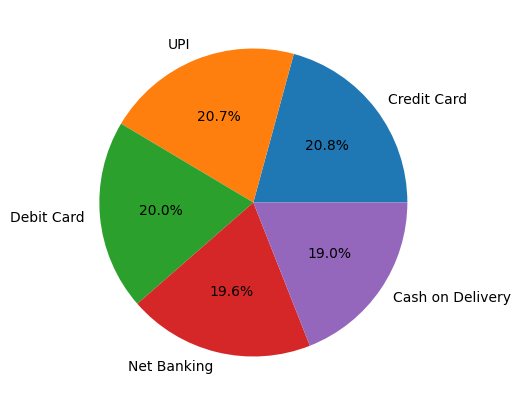

In [146]:
plt.figure(figsize=(10,5))
plt.pie(x = df['Payment_Method'].value_counts().reset_index()['count'] , labels = df['Payment_Method'].value_counts().reset_index()['Payment_Method'],autopct = "%1.1f%%")

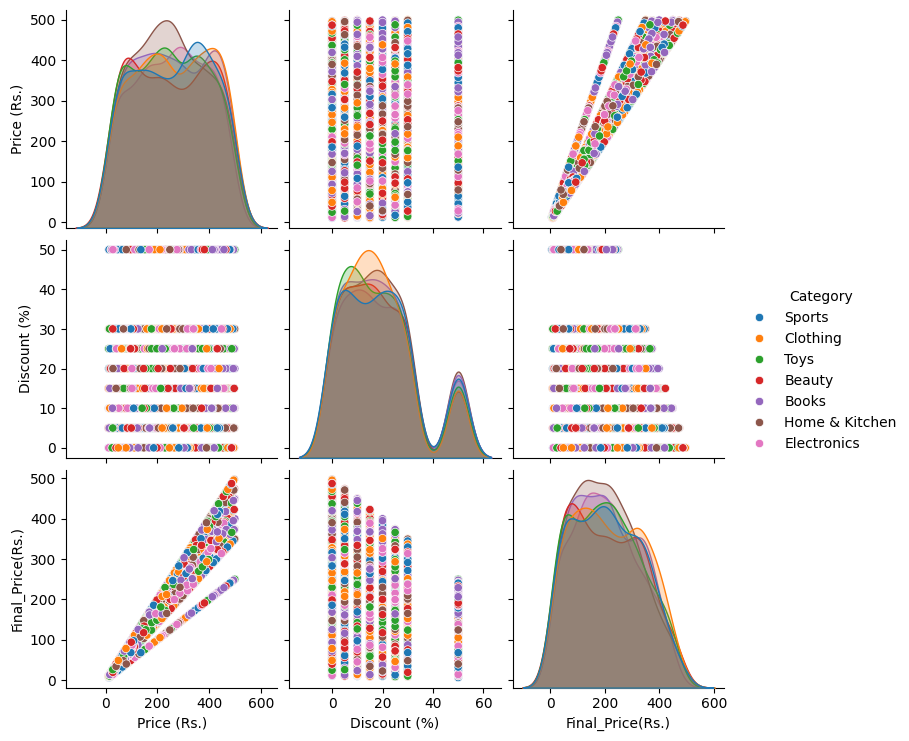

In [149]:
sns.pairplot(df,hue='Category')

In [150]:
df['day'] = df['Purchase_Date'].str.split('-').str[0]
df['month'] = df['Purchase_Date'].str.split('-').str[1]
df['year'] = df['Purchase_Date'].str.split('-').str[2]

df['day'] = df['day'].astype('int32')
df['month'] = df['month'].astype('int32')
df['year'] = df['year'].astype('int32')

df.drop(columns = ['Purchase_Date'],inplace=True)
df.head()

,User_ID,Product_ID,Category,Price (Rs.),Discount (%),Final_Price(Rs.),Payment_Method,day,month,year
0,337c166f,f414122f-e,Sports,36.53,15,31.05,Net Banking,12,11,2024
1,d38a19bf,fde50f9c-5,Clothing,232.79,20,186.23,Net Banking,9,2,2024
2,d7f5f0b0,0d96fc90-3,Sports,317.02,25,237.76,Credit Card,1,9,2024
3,395d4994,964fc44b-d,Toys,173.19,25,129.89,UPI,1,4,2024
4,a83c145c,d70e2fc6-e,Beauty,244.80,20,195.84,Net Banking,27,9,2024


C:\Users\P.DEEPIKA\AppData\Local\Temp\ipykernel_5532\342984995.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df.groupby(by=['month','year'])['User_ID'].count().reset_index(name='count'),x='month',y='count',palette = "flare")


<Axes: xlabel='month', ylabel='count'>

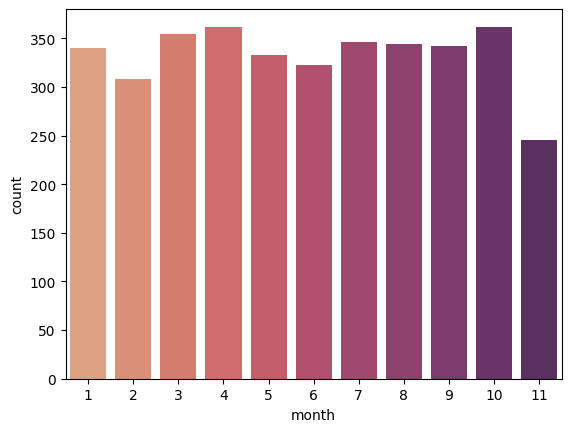

In [151]:
sns.barplot(data=df.groupby(by=['month','year'])['User_ID'].count().reset_index(name='count'),x='month',y='count',palette = "flare")

In [152]:
l = LabelEncoder()
df['Category'] = l.fit_transform(df['Category'])
le = LabelEncoder()
df['Payment_Method'] = le.fit_transform(df['Payment_Method'])

dummy_df=df.iloc[:,3:5].values
x = pd.DataFrame(dummy_df,columns=['Price (Rs.)','Discount (%)'])
y=df['Final_Price(Rs.)']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x_train,y_train)

from sklearn.metrics import r2_score
y_pred_train = linear.predict(x_train)
y_pred_test = linear.predict(x_test)
print(f'Train predicted score ---> {r2_score(y_train,y_pred_train)}')
print(f'Test predicted score ---> {r2_score(y_test,y_pred_test)}')

Train predicted score ---> 0.9718284907669529
Test predicted score ---> 0.9648438931112711
